# TP2 : Exploration de l'année 1861

## Question 1. Nous allons vérifier que les fichiers pdf ont été bien téléchargé

In [89]:
import os
import re
import time
import requests

### Les différent liens urls sont téléchargés

In [90]:
root_url = "https://archives.bruxelles.be/bulletins/date"
resp = requests.get(root_url)
print(f"Status: {resp.status_code}")
print(f"Encoding: {resp.encoding}")
html = resp.text
print(f"Text length: {len(html)}")

pattern = r"https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/.*\.pdf"
urls = re.findall(pattern, html)
print(f"{len(urls)} PDF files found")

Status: 200
Encoding: utf-8
Text length: 821446
2833 PDF files found


### Vérification des différents fichiers téléchargés

In [91]:
pdf_path = '../data/pdf'
ok_count = 0
for url in urls:
    filename = url.split("/")[-1]
    downloads = os.listdir(pdf_path)
    if filename not in downloads:
        print(f"{filename} is missing!")
    else:
        ok_count += 1
print(f"{ok_count} PDFs found out of {len(urls)}!")

Bxl_1847_Tome_I1_Part_1.pdf is missing!
Bxl_1847_Tome_I1_Part_2.pdf is missing!
Bxl_1847_Tome_I1_Part_3.pdf is missing!
Bxl_1847_Tome_I1_Part_4.pdf is missing!
Bxl_1847_Tome_I1_Part_5.pdf is missing!
Bxl_1848_Tome_I1_Part_1.pdf is missing!
Bxl_1848_Tome_I1_Part_2.pdf is missing!
Bxl_1848_Tome_I1_Part_3.pdf is missing!
Bxl_1849_Tome_I1_Part_1.pdf is missing!
Bxl_1849_Tome_I1_Part_2.pdf is missing!
Bxl_1849_Tome_I1_Part_3.pdf is missing!
Bxl_1849_Tome_I1_Part_4.pdf is missing!
Bxl_1849_Tome_I1_Part_5.pdf is missing!
Bxl_1849_Tome_II1_Part_1.pdf is missing!
Bxl_1849_Tome_II1_Part_2.pdf is missing!
Bxl_1849_Tome_II1_Part_3.pdf is missing!
Bxl_1849_Tome_II1_Part_4.pdf is missing!
Bxl_1849_Tome_II1_Part_5.pdf is missing!
Bxl_1849_Tome_II1_Part_6.pdf is missing!
Bxl_1849_Tome_II1_Part_7.pdf is missing!
Bxl_1850_Tome_I1_Part_1.pdf is missing!
Bxl_1850_Tome_I1_Part_2.pdf is missing!
Bxl_1850_Tome_I1_Part_3.pdf is missing!
Bxl_1850_Tome_I1_Part_4.pdf is missing!
Bxl_1850_Tome_II1_Part_1.pdf is m

## Question 2. Nous convertissons les fichiers 

In [92]:
import textract

In [93]:
txt_path = '../data/txt'
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

In [94]:
pdfs = []
for f in os.listdir(pdf_path):
    if os.path.isfile(os.path.join(pdf_path, f)):
        pdfs.append(f)

### Les fichiers pdf sont listés et stocké pour être traité par la suite

In [95]:
not_converted_pdfs = []
for pdf in pdfs:
    file_name = os.path.splitext(pdf)[0]
    if file_name + ".txt" not in txts:
        not_converted_pdfs.append(pdf)

### Les fichiers pdf sont convertis en fichier txt

In [96]:
for pdf in not_converted_pdfs:
    print(pdf)
    try:
        text = textract.process(os.path.join(pdf_path, pdf))
        with open(os.path.join(txt_path, f'{os.path.splitext(pdf)[0]}.txt'), 'wb') as output_file:
            output_file.write(text)
    except:
        print("Error with following file:", pdf)

## Question 3. Choix de l'année 1861

In [97]:
year = 1861

## Question 4. Nous allons extraires les mots clés des documents de l'année 1861

In [98]:
import yake

In [99]:
ignored = set(["conseil communal", "conseil général"])

In [100]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [101]:
data_path = "../data/txt/"
txt_path = '../data/txt'

In [102]:
files_1861 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

In [103]:
this_file = files_1861[0]

In [104]:
text = open(os.path.join(data_path, this_file), 'r').read()

In [105]:
keywords = kw_extractor.extract_keywords(text)

### Nous allons extraire les mots clés

In [106]:
for f in sorted(files_1861)[:10]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1861_Tome_II1_Part_1.txt mentions these keywords: Société Civile, public qu'il, l'Echevin Vanderlinden...
Bxl_1861_Tome_II1_Part_2.txt mentions these keywords: rue Haute, enfants trouvés, grand nombre, conseil provincial, enfants pauvres, Compte moral...
Bxl_1861_Tome_II1_Part_3.txt mentions these keywords: l'année dernière, travaux publics, grande voirie, voie publique, recettes ordinaires, d'une somme...
Bxl_1861_Tome_II1_Part_4.txt mentions these keywords: rue Haute, travaux publics, l'Echevin Vanderlinden, rue Granvelle, rue d'Anderlecht, l'Echevin Watteeu, Conseil adopte...
Bxl_1861_Tome_II1_Part_5.txt mentions these keywords: d'un rapport, l'administration communale, Avis favorable, droit d'écluse...


## Question 5. Nous allons générer un nuage de mots pour l'année 1861

In [107]:
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/ghost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Nous définissons les stopwords

In [108]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)

In [109]:
data_path = '../data'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

In [110]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [111]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

### Nous nettoyons les documents de l'année 1861 à l'aide de la fonction de nettoyage

In [112]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [113]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1861_clean.txt!'

In [114]:
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

In [115]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 740), ('conseil', 459), ('francs', 428), ('bruxelles', 393), ('administration', 293), ('bourgmestre', 290), ('collège', 286), ('section', 270), ('place', 219), ('art', 210)]


### Nous créons un nuage de points des mots de l'année 1861

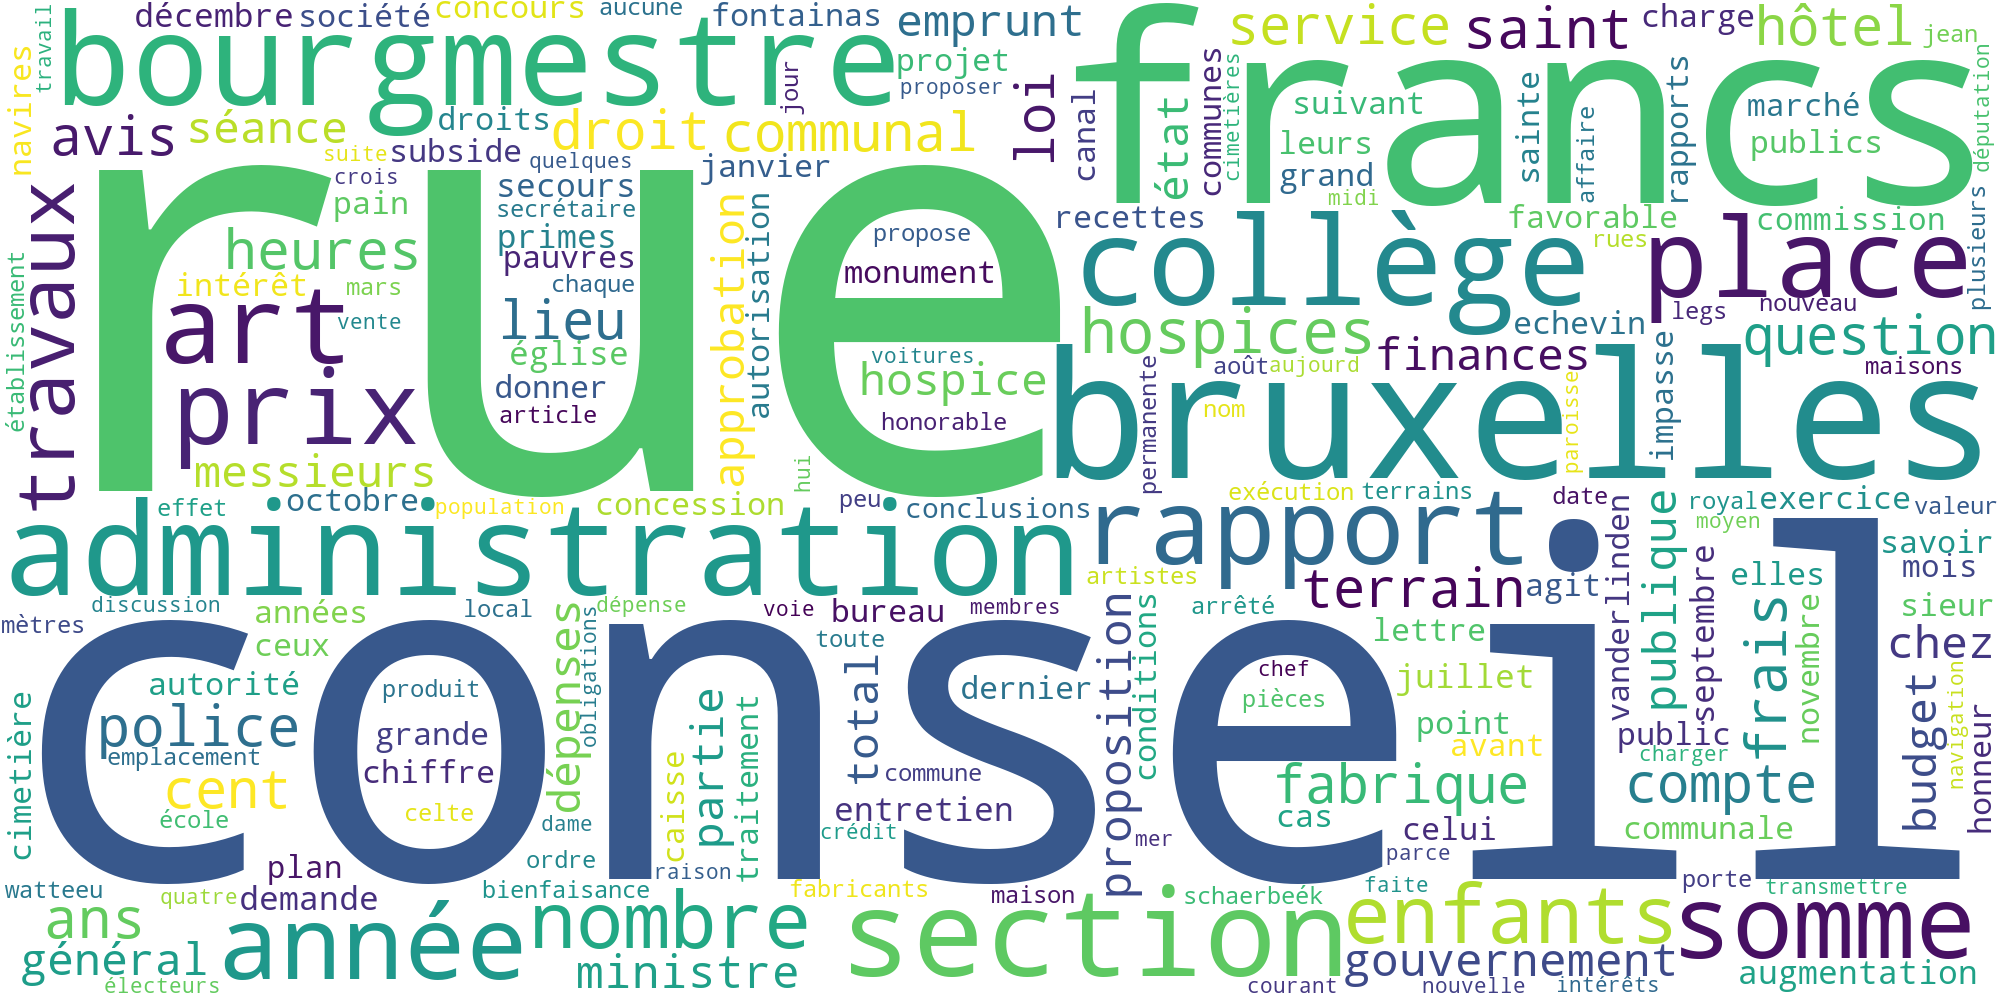

In [116]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Question 6. Nous trouvons les entités nommées principales (personnes, organisations et lieux) pertinentes pour l'année 1861

In [117]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [118]:
nlp = spacy.load('fr_core_news_md')

In [119]:
# Appliquer le test sur toutes les phrases
for sent in sentences:
    doc = nlp(sent)
    entities = []
    for ent in doc.ents:
        entities.append(f"{ent.text} ({ent.label_})")
    if entities:
        print(f"'{doc.text}' contient les entités suivantes : {', '.join(entities)}")
    else:
        print(f"'{doc.text}' ne contient aucune entité")

'Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars' contient les entités suivantes : Apple (ORG)
'Les voitures autonomes déplacent la responsabilité de l'assurance vers les constructeurs' ne contient aucune entité
'San Francisco envisage d'interdire les robots coursiers sur les trottoirs' contient les entités suivantes : San Francisco (LOC)
'Londres est une grande ville du Royaume-Uni' contient les entités suivantes : Londres (LOC), Royaume-Uni (LOC)
'L’Italie choisit ArcelorMittal pour reprendre la plus grande aciérie d’Europe' contient les entités suivantes : Italie (LOC), ArcelorMittal (ORG), Europe (LOC)
'Apple lance HomePod parce qu'il se sent menacé par l'Echo d'Amazon' contient les entités suivantes : Apple (ORG), HomePod (ORG), Echo (ORG), Amazon (ORG)
'La France ne devrait pas manquer d'électricité cet été, même en cas de canicule' contient les entités suivantes : La France (LOC)
'Nouvelles attaques de Trump contre le maire de Londres' contient les entit

In [120]:
n=900000
text = open("../data/tmp/1861.txt", encoding='utf-8').read()[:n]

### Ici est traité le texte pour extraire les entités

In [121]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 2min 1s, sys: 4.14 s, total: 2min 5s
Wall time: 2min 6s


In [122]:
# Compter les entités
people = defaultdict(int)
organisation = defaultdict(int)
location = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location[ent.text] += 1

### Les entités sont extraites

In [123]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)
sorted_location = sorted(location.items(), key=lambda kv: kv[1], reverse=True)

print("Personnes")
for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")
print("Organisations")
for org, freq in sorted_organisation[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")
print("Locations")
for loc, freq in sorted_location[:50]:
    print(f"{loc} apparait {freq} fois dans le corpus")

Personnes
Bourgmestre apparait 115 fois dans le corpus
Messieurs apparait 98 fois dans le corpus
k i l apparait 45 fois dans le corpus
q u e apparait 33 fois dans le corpus
q u i apparait 30 fois dans le corpus
é t é apparait 29 fois dans le corpus
Watteeu apparait 26 fois dans le corpus
Vanderlinden apparait 26 fois dans le corpus
Anspach apparait 24 fois dans le corpus
M. le Bourgmestre apparait 22 fois dans le corpus
u v é apparait 21 fois dans le corpus
Funck apparait 21 fois dans le corpus
Walter apparait 19 fois dans le corpus
u t i o apparait 19 fois dans le corpus
Veldekens apparait 18 fois dans le corpus
Monsieur le Ministre apparait 18 fois dans le corpus
Depaire apparait 16 fois dans le corpus
Leclercq apparait 16 fois dans le corpus
q u é apparait 16 fois dans le corpus
FONTAINAS apparait 16 fois dans le corpus
Capouillet apparait 15 fois dans le corpus
Echevin Vanderlinden apparait 15 fois dans le corpus
Le Secrétaire apparait 15 fois dans le corpus
Goffart apparait 13 foi

## Question 7. Nous Sélectionnons arbitrairement 10 phrases dans les documents de l’année 1861 et les analyser

In [124]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Définition d'une fonction pour extraire les sentiments

In [125]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

### Extration des sentiments dans 10 phrases différentes de l'année 1861

In [127]:
get_sentiment("A dix heures, un concours entre les parties du jeu de grosse balle de la ville et de ses faubourgs, sera ouvert sur la place du jeu de balle, érigée sur le terrain de rancien établissement du Renard.")

This text is 16% positive and 0.15000000000000002% subjective.


In [128]:
get_sentiment("A une heure de relevée, concert d'harmonie militaire, dans le kiosque du Parc.")

This text is 6% negative and 0.05% subjective.


In [129]:
get_sentiment("A quatre heures, un grand concours de t i r à l'arc au berceau pour toutes les sociétés et tous les amateui's du Royaume et do l'étranger, sera ouvert i)ar la Société du Vautour, dans son local, à l'estaminet la Chaîne tVOr, rue des Six-Jetons.")

This text is 14% positive and 0.13333333333333333% subjective.


In [130]:
get_sentiment("Le lundi 15, aune heure de relevée, concert d'harmonie militaire dans le kiosque du Parc.")

This text is 6% negative and 0.05% subjective.


In [131]:
get_sentiment("Le mardi 16, à trois heures de relevée, au canal, bassiiMhi Commerce, auront lieu les jeux dits : du Beaupré et de la Toison.")

This text is neutral and perfectly objective.


In [132]:
get_sentiment("Le dimanche 21, à neuf heures du soir, concert et illumination générale au Jardin royal de Zoologie et d'Horticulture, au quartier Léopold.")

This text is 10% positive and 0.13333333333333333% subjective.


In [133]:
get_sentiment("Un programme particulier donnera les détails de cette fête extraordinaire.")

This text is 2% negative and 0.45% subjective.


In [134]:
get_sentiment("Le 20 de ce mois, à huit beures du soir, les cloches de toutes les églises annonceront la solennité du lendemain.")

This text is 22% positive and 0.1% subjective.


In [135]:
get_sentiment("Le 21, à deux heures de relevée, le clergé catholique fera célébrer, en l'église collégiale des SS. Michel et Gudule, un Te Deum solennel.")

This text is 12% negative and 0.2% subjective.


In [136]:
get_sentiment("Il leur est enjoint de se tenir près des voitures qu'ils accompagnent. Leur p r é s e n c e ne sera point tolérée vers l'entrée de l'église.")

This text is neutral and perfectly objective.
